In [3]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df = df.dropna()
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,774.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1190.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1567.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,833.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,830.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
7654,2.0,17.0,70.0,1134.0,0.0,0.0,1.0,0.0,49.0
7655,3.0,8.0,226.0,1101.0,1.0,0.0,0.0,0.0,70.0
7656,40.0,3.0,147.0,782.0,0.0,0.0,0.0,1.0,90.0
7657,52.0,1.0,88.0,774.0,1.0,0.0,0.0,0.0,65.0


In [106]:
df.corr()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
number_of_reviews,1.000000,-0.007382,0.142246,-0.433202,0.002756,0.018684,-0.006723,-0.000932,0.048492
calculated_host_listings_count,-0.007382,1.000000,0.171054,-0.101889,-0.020436,0.010314,0.021767,-0.013467,0.121820
availability_365,0.142246,0.171054,1.000000,-0.259133,0.012557,0.003953,-0.013617,0.000026,0.141251
datetime_diff,-0.433202,-0.101889,-0.259133,1.000000,0.022695,-0.003953,-0.021871,-0.001036,-0.107297
room_type=0,0.002756,-0.020436,0.012557,0.022695,1.000000,-0.135705,-0.945946,-0.151772,-0.018313
room_type=1,0.018684,0.010314,0.003953,-0.003953,-0.135705,1.000000,-0.081834,-0.013130,-0.003576
room_type=2,-0.006723,0.021767,-0.013617,-0.021871,-0.945946,-0.081834,1.000000,-0.091523,0.021651
room_type=3,-0.000932,-0.013467,0.000026,-0.001036,-0.151772,-0.013130,-0.091523,1.000000,-0.009211
price,0.048492,0.121820,0.141251,-0.107297,-0.018313,-0.003576,0.021651,-0.009211,1.000000


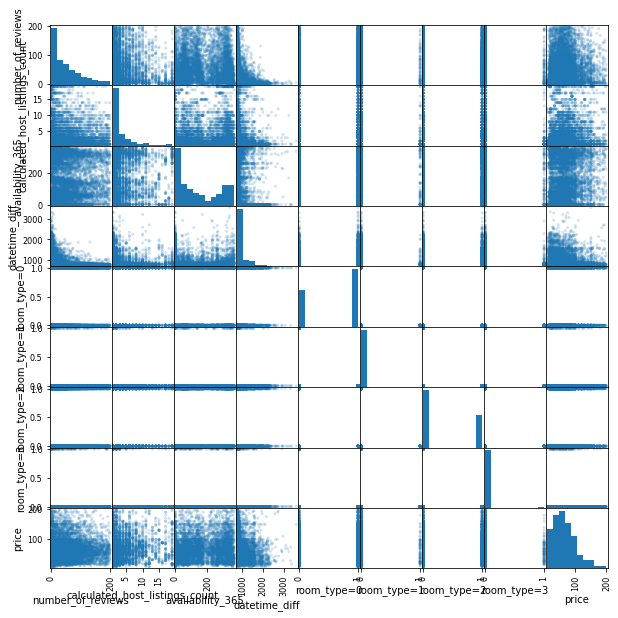

In [107]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [108]:
from sklearn.feature_selection import RFE
names = ['number_of_reviews', 'calculated_host_listings_count', 
         'availability_365', 'datetime_diff', 'room_type=0', 'room_type=1', 'room_type=2', 'room_type=3', 'price']
array = df.values
X = array[:,0:8]
Y = array[:,8]
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

In [109]:
fit.n_features_
fit.support_
fit.ranking_

# The best after recursive feature elimination is number_of_reviews, the second is aviability_365 and the third is datetime_diff

array([1, 4, 2, 3, 6, 8, 5, 7])

In [110]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 0:1], y_train)

In [112]:
sr.coef_, sr.intercept_

(array([0.0260317]), 64.29558460752384)

In [113]:
y_pred = sr.predict(X_test[:, 2:3])

In [114]:
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.001254045911094237, 0.004595172658734881)

In [115]:
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.012659300862628342, 0.004595172658734881)

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(1351.9135089651734, 1299.3218959088722)

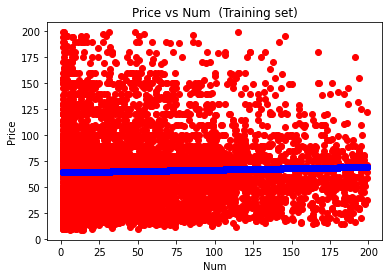

In [117]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sr.predict(X_train[:, 0:1]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

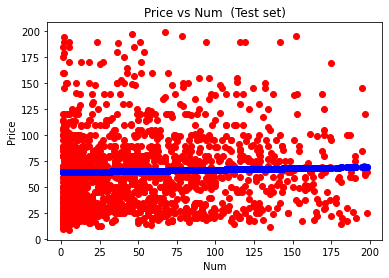

In [118]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [119]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [120]:
mr.coef_, mr.intercept_

(array([-0.00621646,  0.89023704,  0.03039957, -0.00794671, -0.49922953,
         2.01501124,  1.8166618 , -3.33244351]),
 66.09294796501226)

In [121]:
y_pred = mr.predict(X_test)

In [122]:
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.03270608148708076, 0.03961862607275812)

In [123]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(1324.4645102951733, 1261.4552951846401)

In [124]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues

array([7.99737063e-143, 5.45924758e-001, 1.37270005e-012, 1.66875871e-015,
       1.39841102e-006, 8.74227753e-022, 2.31088594e-005, 9.43818314e-028,
       1.76686051e-003])

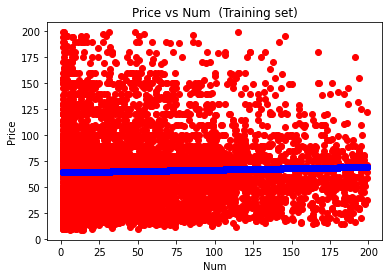

In [125]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sr.predict(X_train[:, 0:1]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

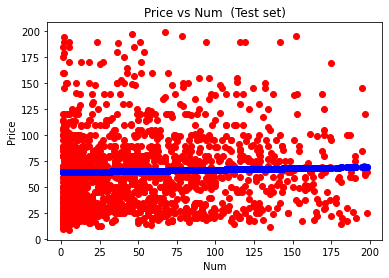

In [126]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [127]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [128]:
X_Modeled

array([[ 49.,   1., 119., 755.,   1.],
       [ 99.,   1.,  27., 763.,   1.],
       [ 15.,   6.,  68., 757.,   1.],
       ...,
       [ 40.,   1., 169., 843.,   1.],
       [176.,   2.,  31., 775.,   1.],
       [146.,   1., 260., 761.,   1.]])

In [129]:
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [130]:
omr.coef_, omr.intercept_

(array([-0.00625571,  0.89702853,  0.03019964, -0.00804262]), 66.5091672789599)

In [131]:
y_pred = omr.predict(X_test[:, 0:4])

In [132]:
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.031645951905443725, 0.04314198401041025)

In [133]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(1325.9160897792572, 1256.827385223093)

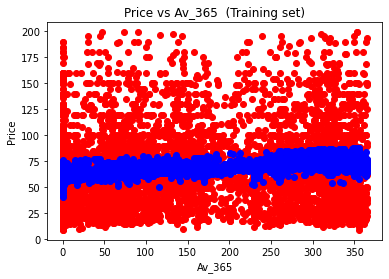

In [134]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

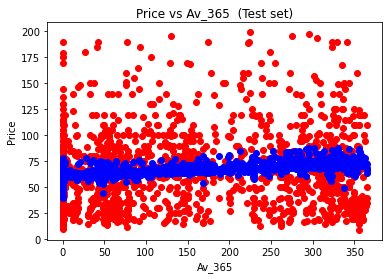

In [135]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [136]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [137]:
pr.coef_, pr.intercept_

(array([ 0.18665879, -0.000443  ]), 55.44977196192967)

In [138]:
y_pred = pr.predict(X_test_p[:,1:])

In [139]:
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.03613183251288443, 0.06160814745415666)

In [140]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(1319.7738102215499, 1232.5721879751468)

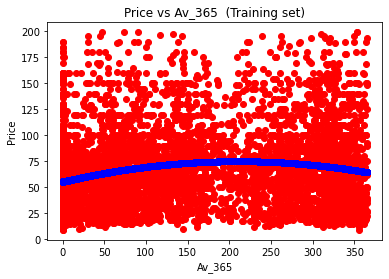

In [141]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

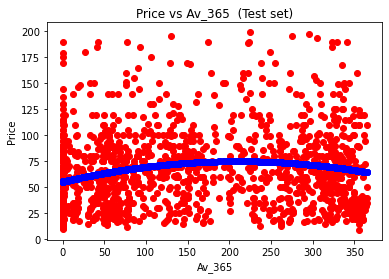

In [142]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()